In [79]:
!pip install tensorflow opencv-python matplotlib

In [80]:
import tensorflow as tf
import os
import cv2
import imghdr

# Pre-processing

In [81]:
data_dir = 'data' 

In [82]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [83]:
#to remove non-image files
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [84]:
import numpy as np
from matplotlib import pyplot as plt

In [85]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()

In [87]:
batch = data_iterator.next()

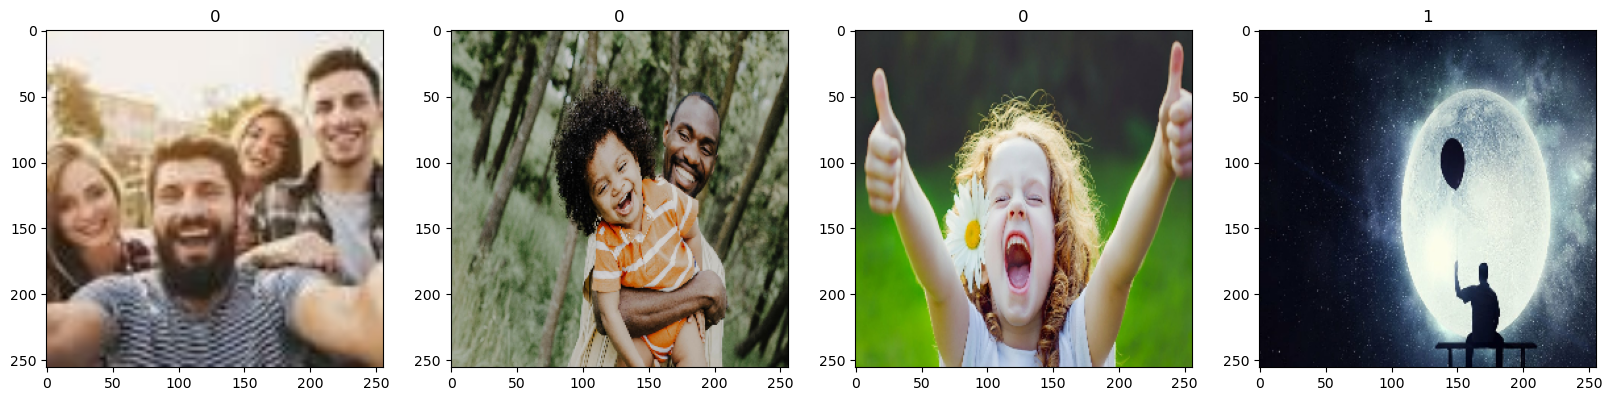

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [89]:
data = data.map(lambda x,y: (x/255, y))

In [90]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [92]:
train_size

7

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [94]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model creation

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [96]:
model = Sequential()

In [97]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Train

In [100]:
logdir='logs'

In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [102]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 537ms/step - loss: 0.9550 - accuracy: 0.5000 - val_loss: 0.6675 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 5s 489ms/step - loss: 0.6586 - accuracy: 0.6429 - val_loss: 0.7363 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 5s 493ms/step - loss: 0.5420 - accuracy: 0.7277 - val_loss: 0.4588 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 5s 490ms/step - loss: 0.4460 - accuracy: 0.7768 - val_loss: 0.3950 - val_accuracy: 0.9688
Epoch 5/20
7/7 [==============================] - 4s 471ms/step - loss: 0.3485 - accuracy: 0.8973 - val_loss: 0.2552 - val_accuracy: 0.9531
Epoch 6/20
7/7 [==============================] - 5s 477ms/step - loss: 0.2478 - accuracy: 0.9062 - val_loss: 0.1789 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 5s 505ms/step - loss: 0.1737 - accuracy: 0.9554 - val_loss: 0.1298 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====

# Performance

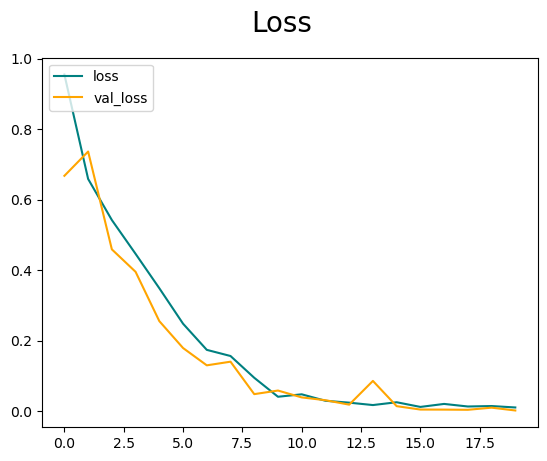

In [103]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

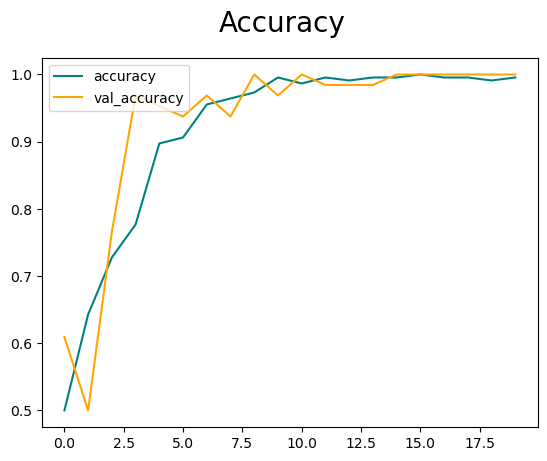

In [104]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Check

In [105]:
import cv2

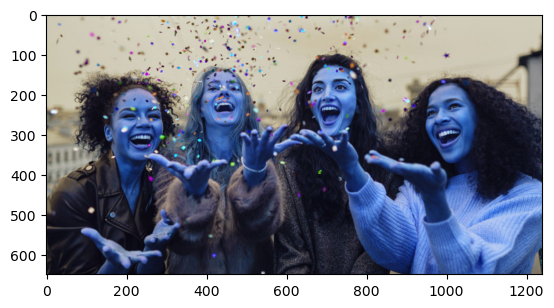

In [106]:
img = cv2.imread('happy.jpg')
plt.imshow(img)
plt.show()

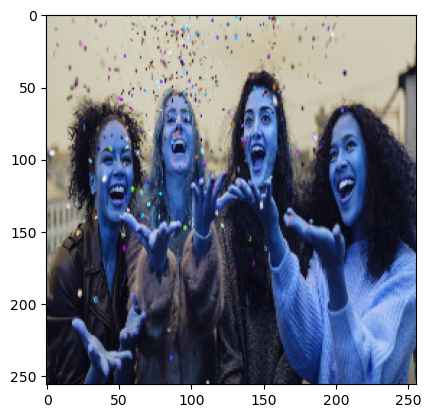

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 137ms/step


In [109]:
yhat

array([[0.15444234]], dtype=float32)

In [110]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
